In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Overwatch Competitive Ranks.csv')
df.tail()

,Timestamp,What rank (number between 1 and 100) did you receive after placement matches?
1801,2016/06/29 3:59:43 PM EST,60
1802,2016/06/29 3:59:44 PM EST,58
1803,2016/06/29 3:59:56 PM EST,55
1804,2016/06/29 4:00:11 PM EST,53
1805,2016/06/29 4:00:33 PM EST,53


In [8]:
# strip any string entries out of the dataframe, convert strings to NaN
# drop NaN values
df = pd.to_numeric(df['What rank (number between 1 and 100) did you receive after placement matches? '], errors='coerce')
df.dropna(inplace=True)

In [11]:
# convert back to DataFrame object
# drop any values outside of range 1-100
df2 = pd.DataFrame(df)
df2 = df2.rename(columns={'What rank (number between 1 and 100) did you receive after placement matches? ': 'rank'})
df2 = df2.drop(df2[(df2['rank'] < 10.0) | (df2['rank'] > 85.0)].index)

In [12]:
# cleaned dataset information
df2.describe()

,rank
count,1714.000000
mean,51.931739
std,6.932794
min,10.000000
25%,48.000000
50%,52.000000
75%,56.000000
max,80.000000


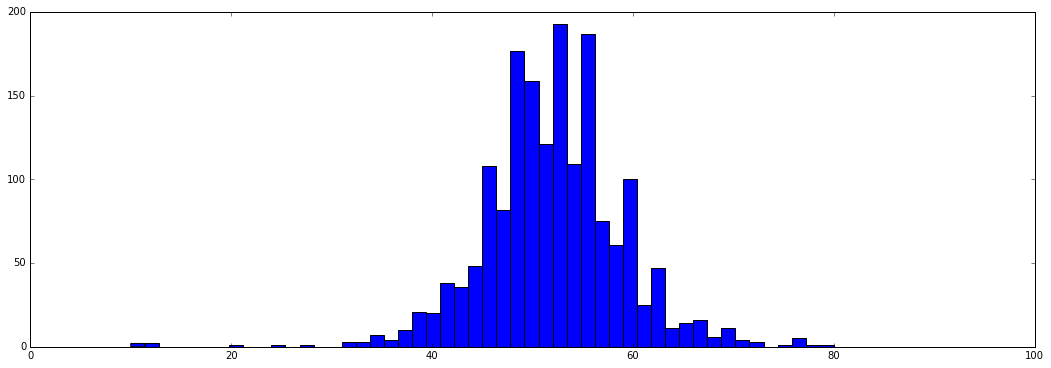

In [18]:
# plot the distribution of ranks
plt.figure(figsize=(18,6))
plt.xlim([0,100])
plt.hist(df2['rank'],bins=50)
plt.show()